In [1]:
%reload_kedro

2020-03-24 17:28:00,503 - root - INFO - ** Kedro project Dynamic Topic Modeling
2020-03-24 17:28:00,504 - root - INFO - Defined global variable `context` and `catalog`


In [2]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
docs = pd.read_csv("data/03_primary/un-general-debates-preprocessed.csv")
docs = docs.drop(columns=["session", "country", "timeslice"])
docs["text"] = docs["text"].apply(lambda doc: doc[1:-1].replace("'", "").replace(",", "").split(" "))
docs

,timestamp,text
0,1970,"[general, assembly, fortunate, indeed, preside..."
1,1970,"[give, great, pleasure, mr, president, extend,..."
2,1970,"[mr, president, behalf, excellency, mzee, jomo..."
3,1970,"[mr, president, pleasure, speak, time, presidi..."
4,1970,"[may, say, delegation, malaysia, philippine, d..."
...,...,...
7502,2015,"[would, first, like, congratulate, mr, preside..."
7503,2015,"[distinct, honour, privilege, participate, pro..."
7504,2015,"[enormously, happy, behalf, bolivian, people, ..."
7505,2015,"[costa, rica, would, like, congratulate, sir, ..."


# Doc2Vec

In [4]:
def read_corpus(docs):
    for i, text in enumerate(docs):
        yield TaggedDocument(text, [i])

In [5]:
corpus = list(read_corpus(docs["text"]))

In [6]:
model = Doc2Vec(vector_size=300, min_count=2, epochs=50)

In [7]:
model.build_vocab(corpus)

2020-03-24 17:28:03,242 - gensim.models.doc2vec - INFO - collecting all words and their counts
2020-03-24 17:28:03,242 - gensim.models.doc2vec - INFO - PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-03-24 17:28:04,915 - gensim.models.doc2vec - INFO - collected 46754 word types and 7507 unique tags from a corpus of 7507 examples and 11265309 words
2020-03-24 17:28:04,916 - gensim.models.word2vec - INFO - Loading a fresh vocabulary
2020-03-24 17:28:04,985 - gensim.models.word2vec - INFO - effective_min_count=2 retains 31139 unique words (66% of original 46754, drops 15615)
2020-03-24 17:28:04,986 - gensim.models.word2vec - INFO - effective_min_count=2 leaves 11249694 word corpus (99% of original 11265309, drops 15615)
2020-03-24 17:28:05,068 - gensim.models.word2vec - INFO - deleting the raw counts dictionary of 46754 items
2020-03-24 17:28:05,070 - gensim.models.word2vec - INFO - sample=0.001 downsamples 33 most-common words
2020-03-24 17:28:05,070 - gensim.

In [8]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

2020-03-24 17:28:11,398 - gensim.models.base_any2vec - INFO - training model with 3 workers on 31139 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-03-24 17:28:12,412 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 5.83% examples, 815685 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:28:13,415 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 9.52% examples, 664498 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:28:14,431 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 11.26% examples, 527201 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:28:15,438 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 17.10% examples, 605841 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:28:16,440 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 22.87% examples, 650657 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:28:17,446 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 28.65% examples, 680357 word

2020-03-24 17:29:01,246 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 6.02% examples, 835142 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:02,263 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 12.18% examples, 846055 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:03,264 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 18.08% examples, 850349 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:04,287 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 24.00% examples, 847377 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:05,289 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 27.97% examples, 794722 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:06,313 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 29.89% examples, 703110 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:07,322 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 36.22% examples, 716995 words/s, in_qsize 5, out_qsize 0
2020-03

2020-03-24 17:29:50,145 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 5.93% examples, 833189 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:51,149 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 9.52% examples, 667408 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:52,159 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 11.26% examples, 529758 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:53,166 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 17.16% examples, 609834 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:29:54,172 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 22.70% examples, 647209 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:55,173 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 28.32% examples, 675025 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:29:56,180 - gensim.models.base_any2vec - INFO - EPOCH 7 - PROGRESS: at 34.78% examples, 696781 words/s, in_qsize 5, out_qsize 0
2020-03-

2020-03-24 17:30:40,129 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 18.24% examples, 858881 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:41,129 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 23.11% examples, 820161 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:42,154 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 24.86% examples, 704993 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:43,157 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 29.24% examples, 691332 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:44,157 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 34.78% examples, 693925 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:45,160 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 36.83% examples, 638894 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:30:46,161 - gensim.models.base_any2vec - INFO - EPOCH 10 - PROGRESS: at 41.56% examples, 628405 words/s, in_qsize 5, out_qsize 0

2020-03-24 17:31:29,670 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 18.17% examples, 865468 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:31:30,672 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 24.18% examples, 865002 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:31:31,672 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 30.29% examples, 865062 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:31:32,677 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 37.14% examples, 863551 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:31:33,678 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 44.27% examples, 854630 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:31:34,716 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 49.69% examples, 818634 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:31:35,723 - gensim.models.base_any2vec - INFO - EPOCH 13 - PROGRESS: at 52.00% examples, 753237 words/s, in_qsize 5, out_qsize 0

2020-03-24 17:32:18,010 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 13.84% examples, 474769 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:32:19,015 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 18.08% examples, 501520 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:32:20,031 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 24.18% examples, 562133 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:32:21,032 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 29.96% examples, 598340 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:32:22,043 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 34.54% examples, 595348 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:32:23,054 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 36.51% examples, 557247 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:32:24,058 - gensim.models.base_any2vec - INFO - EPOCH 16 - PROGRESS: at 43.19% examples, 576090 words/s, in_qsize 5, out_qsize 0

2020-03-24 17:33:08,262 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:33:08,262 - gensim.models.base_any2vec - INFO - EPOCH - 18 : training on 11265309 raw words (10551987 effective words) took 18.7s, 564274 effective words/s
2020-03-24 17:33:09,274 - gensim.models.base_any2vec - INFO - EPOCH 19 - PROGRESS: at 5.66% examples, 791982 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:33:10,277 - gensim.models.base_any2vec - INFO - EPOCH 19 - PROGRESS: at 11.03% examples, 777216 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:33:11,319 - gensim.models.base_any2vec - INFO - EPOCH 19 - PROGRESS: at 13.16% examples, 612249 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:33:12,326 - gensim.models.base_any2vec - INFO - EPOCH 19 - PROGRESS: at 16.29% examples, 573424 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:33:13,331 - gensim.models.base_any2vec - INFO - EPOCH 19 - PROGRESS: at 21.78% examples, 616364 words/s, in_qsize 5, out_qsiz

2020-03-24 17:33:57,849 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:33:57,850 - gensim.models.base_any2vec - INFO - EPOCH - 21 : training on 11265309 raw words (10554066 effective words) took 15.7s, 670284 effective words/s
2020-03-24 17:33:58,862 - gensim.models.base_any2vec - INFO - EPOCH 22 - PROGRESS: at 5.83% examples, 817335 words/s, in_qsize 4, out_qsize 1
2020-03-24 17:33:59,879 - gensim.models.base_any2vec - INFO - EPOCH 22 - PROGRESS: at 9.23% examples, 640477 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:34:00,885 - gensim.models.base_any2vec - INFO - EPOCH 22 - PROGRESS: at 11.51% examples, 538349 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:34:01,898 - gensim.models.base_any2vec - INFO - EPOCH 22 - PROGRESS: at 17.45% examples, 617048 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:34:02,904 - gensim.models.base_any2vec - INFO - EPOCH 22 - PROGRESS: at 21.10% examples, 598116 words/s, in_qsize 5, out_qsize

2020-03-24 17:34:46,861 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:34:46,862 - gensim.models.base_any2vec - INFO - EPOCH - 24 : training on 11265309 raw words (10554381 effective words) took 16.6s, 634128 effective words/s
2020-03-24 17:34:47,867 - gensim.models.base_any2vec - INFO - EPOCH 25 - PROGRESS: at 5.93% examples, 831106 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:34:48,875 - gensim.models.base_any2vec - INFO - EPOCH 25 - PROGRESS: at 8.54% examples, 600124 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:34:49,880 - gensim.models.base_any2vec - INFO - EPOCH 25 - PROGRESS: at 11.46% examples, 538687 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:34:50,884 - gensim.models.base_any2vec - INFO - EPOCH 25 - PROGRESS: at 17.38% examples, 618855 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:34:51,900 - gensim.models.base_any2vec - INFO - EPOCH 25 - PROGRESS: at 20.49% examples, 582736 words/s, in_qsize 5, out_qsize

2020-03-24 17:35:37,835 - gensim.models.base_any2vec - INFO - EPOCH 27 - PROGRESS: at 95.66% examples, 627429 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:35:38,199 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:35:38,209 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:35:38,226 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:35:38,227 - gensim.models.base_any2vec - INFO - EPOCH - 27 : training on 11265309 raw words (10552931 effective words) took 16.7s, 632385 effective words/s
2020-03-24 17:35:39,229 - gensim.models.base_any2vec - INFO - EPOCH 28 - PROGRESS: at 6.14% examples, 868548 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:35:40,239 - gensim.models.base_any2vec - INFO - EPOCH 28 - PROGRESS: at 12.16% examples, 856345 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:35:41,240 - gensim.models.ba

2020-03-24 17:36:26,936 - gensim.models.base_any2vec - INFO - EPOCH 30 - PROGRESS: at 95.63% examples, 673359 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:36:27,312 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:36:27,315 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:36:27,323 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:36:27,324 - gensim.models.base_any2vec - INFO - EPOCH - 30 : training on 11265309 raw words (10554276 effective words) took 15.6s, 677705 effective words/s
2020-03-24 17:36:28,329 - gensim.models.base_any2vec - INFO - EPOCH 31 - PROGRESS: at 2.53% examples, 355643 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:36:29,344 - gensim.models.base_any2vec - INFO - EPOCH 31 - PROGRESS: at 5.49% examples, 383580 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:36:30,345 - gensim.models.bas

2020-03-24 17:37:15,655 - gensim.models.base_any2vec - INFO - EPOCH 33 - PROGRESS: at 77.55% examples, 675300 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:37:16,656 - gensim.models.base_any2vec - INFO - EPOCH 33 - PROGRESS: at 83.44% examples, 657364 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:37:17,664 - gensim.models.base_any2vec - INFO - EPOCH 33 - PROGRESS: at 94.58% examples, 669444 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:37:18,528 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:37:18,552 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:37:18,568 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:37:18,570 - gensim.models.base_any2vec - INFO - EPOCH - 33 : training on 11265309 raw words (10553812 effective words) took 16.1s, 657179 effective words/s
2020-03-24 17:37:19,580 - gensim.models.b

2020-03-24 17:38:04,721 - gensim.models.base_any2vec - INFO - EPOCH 36 - PROGRESS: at 71.80% examples, 643895 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:05,742 - gensim.models.base_any2vec - INFO - EPOCH 36 - PROGRESS: at 80.56% examples, 640124 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:06,768 - gensim.models.base_any2vec - INFO - EPOCH 36 - PROGRESS: at 84.15% examples, 614310 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:07,775 - gensim.models.base_any2vec - INFO - EPOCH 36 - PROGRESS: at 94.45% examples, 624506 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:08,264 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:38:08,272 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:38:08,273 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:38:08,274 - gensim.models.base_any2vec - INFO - EPOCH 

2020-03-24 17:38:53,705 - gensim.models.base_any2vec - INFO - EPOCH 39 - PROGRESS: at 59.77% examples, 626900 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:54,730 - gensim.models.base_any2vec - INFO - EPOCH 39 - PROGRESS: at 66.82% examples, 619291 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:55,732 - gensim.models.base_any2vec - INFO - EPOCH 39 - PROGRESS: at 70.44% examples, 594027 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:56,742 - gensim.models.base_any2vec - INFO - EPOCH 39 - PROGRESS: at 82.43% examples, 609389 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:57,751 - gensim.models.base_any2vec - INFO - EPOCH 39 - PROGRESS: at 93.83% examples, 624860 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:38:58,271 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:38:58,281 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:38:58,288 - gensim.models.base_

2020-03-24 17:39:41,366 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:39:41,368 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:39:41,369 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:39:41,369 - gensim.models.base_any2vec - INFO - EPOCH - 42 : training on 11265309 raw words (10554431 effective words) took 15.5s, 680941 effective words/s
2020-03-24 17:39:42,374 - gensim.models.base_any2vec - INFO - EPOCH 43 - PROGRESS: at 6.31% examples, 890887 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:39:43,412 - gensim.models.base_any2vec - INFO - EPOCH 43 - PROGRESS: at 10.71% examples, 742097 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:39:44,478 - gensim.models.base_any2vec - INFO - EPOCH 43 - PROGRESS: at 12.69% examples, 578751 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:39:45,481 - gensim.models.ba

2020-03-24 17:40:29,977 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:40:29,985 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:40:29,993 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:40:29,994 - gensim.models.base_any2vec - INFO - EPOCH - 45 : training on 11265309 raw words (10552873 effective words) took 16.7s, 633356 effective words/s
2020-03-24 17:40:31,006 - gensim.models.base_any2vec - INFO - EPOCH 46 - PROGRESS: at 2.72% examples, 379573 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:40:32,029 - gensim.models.base_any2vec - INFO - EPOCH 46 - PROGRESS: at 5.66% examples, 393265 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:40:33,035 - gensim.models.base_any2vec - INFO - EPOCH 46 - PROGRESS: at 11.72% examples, 547138 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:40:34,043 - gensim.models.bas

2020-03-24 17:41:19,460 - gensim.models.base_any2vec - INFO - EPOCH 48 - PROGRESS: at 94.45% examples, 624121 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:41:19,931 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-03-24 17:41:19,932 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-03-24 17:41:19,940 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-03-24 17:41:19,941 - gensim.models.base_any2vec - INFO - EPOCH - 48 : training on 11265309 raw words (10554123 effective words) took 16.7s, 631186 effective words/s
2020-03-24 17:41:20,947 - gensim.models.base_any2vec - INFO - EPOCH 49 - PROGRESS: at 6.26% examples, 883223 words/s, in_qsize 5, out_qsize 0
2020-03-24 17:41:21,950 - gensim.models.base_any2vec - INFO - EPOCH 49 - PROGRESS: at 12.22% examples, 861790 words/s, in_qsize 6, out_qsize 0
2020-03-24 17:41:22,967 - gensim.models.ba

In [9]:
n_clusters = 7

In [10]:
km = KMeans(n_clusters=n_clusters, n_jobs=-1)
X = km.fit(model.docvecs.vectors_docs)

In [11]:
points = pd.DataFrame(TSNE(n_components=2).fit_transform(model.docvecs.vectors_docs))
points['target'] = km.labels_

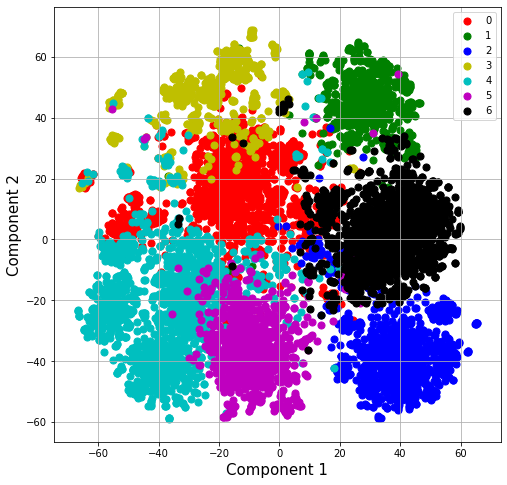

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)

targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
for target, color in zip(targets, colors):
    indicesToKeep = points['target'] == target
    ax.scatter(points.loc[indicesToKeep, 0]
               , points.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stats on clusters

In [13]:
points['text'] = docs['text'].apply(lambda x: " ".join(word for word in x))
points

,0,1,target,text
0,-19.144617,-7.089272,0,general assembly fortunate indeed president ye...
1,-14.631294,-19.101370,5,give great pleasure mr president extend sincer...
2,-14.183870,-22.864326,5,mr president behalf excellency mzee jomo kenya...
3,56.106640,10.995152,6,mr president pleasure speak time presiding mee...
4,-16.023985,-16.604055,4,may say delegation malaysia philippine delegat...
...,...,...,...,...
7502,1.948409,-21.900318,5,would first like congratulate mr president ele...
7503,23.469076,-10.642775,6,distinct honour privilege participate proceedi...
7504,64.967529,-27.647398,2,enormously happy behalf bolivian people expres...
7505,-2.075071,11.744849,0,costa rica would like congratulate sir electio...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Most frequent words per topic using CountVectorizer

In [15]:
n = 8

In [16]:
for target in targets:
    indicesToKeep = points['target'] == target
    cor = list(points.loc[indicesToKeep, "text"])
    vec = CountVectorizer(max_df=0.8, ngram_range=(1,2)).fit(cor)
    bag_of_words = vec.transform(cor)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(str(target) + " : " + str([x[0] for x in words_freq[:n]]))

0 : ['problem', 'european', 'nuclear', 'war', 'operation', 'conference', 'europe', 'resolution']
1 : ['iraq', 'israeli', 'developing', 'lebanon', 'weapon', 'africa', 'aggression', 'nuclear']
2 : ['american', 'solution', 'latin', 'human right', 'power', 'war', 'policy', 'developing']
3 : ['nuclear', 'weapon', 'soviet', 'democratic', 'military', 'operation', 'united state', 'disarmament']
4 : ['problem', 'south', 'nuclear', 'developing country', 'island', 'small', 'change', 'conference']
5 : ['south', 'south africa', 'delegation', 'developing country', 'conference', 'power', 'region', 'namibia']
6 : ['south', 'crisis', 'relation', 'war', 'delegation', 'force', 'operation', 'power']


## Most frequent words per topic using tf-idf

In [17]:
for target in targets:
    indicesToKeep = points['target'] == target
    cor = list(points.loc[indicesToKeep, "text"])
    vec = TfidfVectorizer(max_df=0.8, ngram_range=(1,2)).fit(cor)
    bag_of_words = vec.transform(cor)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(str(target) + " : " + str([x[0] for x in words_freq[:n]]))

0 : ['problem', 'european', 'nuclear', 'cooperation', 'operation', 'weapon', 'europe', 'conference']
1 : ['iraq', 'lebanon', 'israeli', 'terrorism', 'developing', 'nuclear', 'aggression', 'weapon']
2 : ['co', 'american', 'human right', 'latin', 'democracy', 'central', 'solution', 'operation']
3 : ['nuclear', 'weapon', 'soviet', 'co', 'co operation', 'cooperation', 'operation', 'disarmament']
4 : ['island', 'nuclear', 'south', 'problem', 'small', 'developing country', 'change', 'pacific']
5 : ['south', 'south africa', 'delegation', 'developing country', 'namibia', 'conference', 'nuclear', 'power']
6 : ['south', 'co', 'guinea', 'delegation', 'crisis', 'operation', 'co operation', 'relation']
